#  Wine Quality Classification - ML Assignment 2
## M.Tech AIML/DSE | BITS Pilani

**Dataset**: Wine Quality (UCI ML Repository) - Red & White combined

**Task**: Binary Classification (Good Wine: quality ≥ 7, Bad Wine: quality < 7)

**Features**: 12 | **Instances**: 6,497

**Models**: Logistic Regression, Decision Tree, kNN, Naive Bayes, Random Forest, XGBoost

---
## Cell 1: Install Required Libraries

---
## Cell 2: Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score,
    recall_score, f1_score, matthews_corrcoef,
    classification_report, confusion_matrix, roc_curve
)

print('All libraries imported successfully!')

All libraries imported successfully!


---
## Cell 3: Load the Wine Quality Dataset

In [3]:
# Load Red and White wine datasets from UCI repository
red_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
white_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

print(f'Red wine samples:   {red_wine.shape[0]}')
print(f'White wine samples: {white_wine.shape[0]}')
print(f'\nRed wine columns:   {list(red_wine.columns)}')

Red wine samples:   1599
White wine samples: 4898

Red wine columns:   ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


---
## Cell 4: Combine Datasets and Add wine_type Feature

In [4]:
# Add wine_type feature: 0 = Red, 1 = White
red_wine['wine_type'] = 0
white_wine['wine_type'] = 1

# Combine into one dataset
df = pd.concat([red_wine, white_wine], axis=0, ignore_index=True)

print(f'Combined dataset shape: {df.shape}')
print(f'Total instances: {df.shape[0]}')
print(f'Total columns:   {df.shape[1]}')
print(f'\nFirst 5 rows:')
df.head()

Combined dataset shape: (6497, 13)
Total instances: 6497
Total columns:   13

First 5 rows:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


---
## Cell 5: Dataset Info and Missing Values Check

In [5]:
print('Dataset Info:')
print('=' * 50)
print(df.info())
print('\nMissing Values:')
print(df.isnull().sum())
print(f'\nTotal missing values: {df.isnull().sum().sum()}')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB
None

Missing Values:
fixed acidity           0
volatile acid

---
## Cell 6: Dataset Statistics

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


---
## Cell 7: Quality Distribution (Original Target)

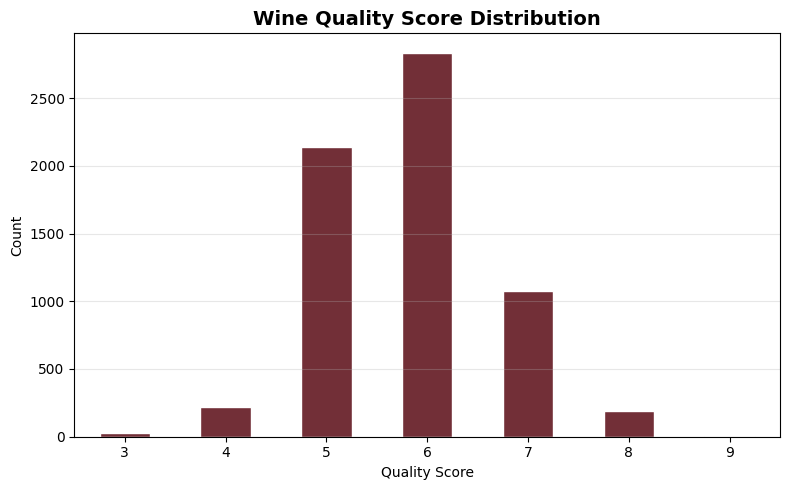

Quality Distribution:
quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64


In [7]:
plt.figure(figsize=(8, 5))
df['quality'].value_counts().sort_index().plot(kind='bar', color='#722F37', edgecolor='white')
plt.title('Wine Quality Score Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print('Quality Distribution:')
print(df['quality'].value_counts().sort_index())

---
## Cell 8: Create Binary Target Variable

Binary Target Distribution:
  Bad Wine  (0): 5220 (80.3%)
  Good Wine (1): 1277 (19.7%)


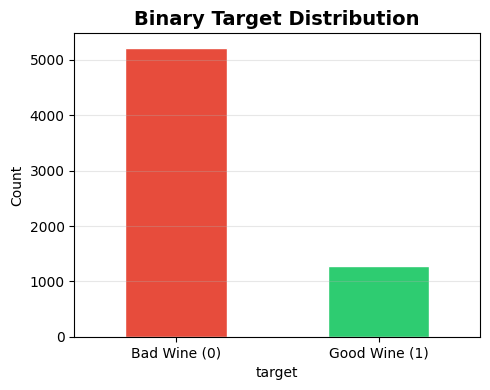

In [8]:
# Binary classification: Good wine (quality >= 7) = 1, Bad wine (quality < 7) = 0
df['target'] = (df['quality'] >= 7).astype(int)

print('Binary Target Distribution:')
print(f'  Bad Wine  (0): {(df["target"] == 0).sum()} ({(df["target"] == 0).mean()*100:.1f}%)')
print(f'  Good Wine (1): {(df["target"] == 1).sum()} ({(df["target"] == 1).mean()*100:.1f}%)')

plt.figure(figsize=(5, 4))
df['target'].value_counts().plot(kind='bar', color=['#e74c3c', '#2ecc71'], edgecolor='white')
plt.title('Binary Target Distribution', fontsize=14, fontweight='bold')
plt.xticks([0, 1], ['Bad Wine (0)', 'Good Wine (1)'], rotation=0)
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

---
## Cell 9: Feature Correlation Heatmap

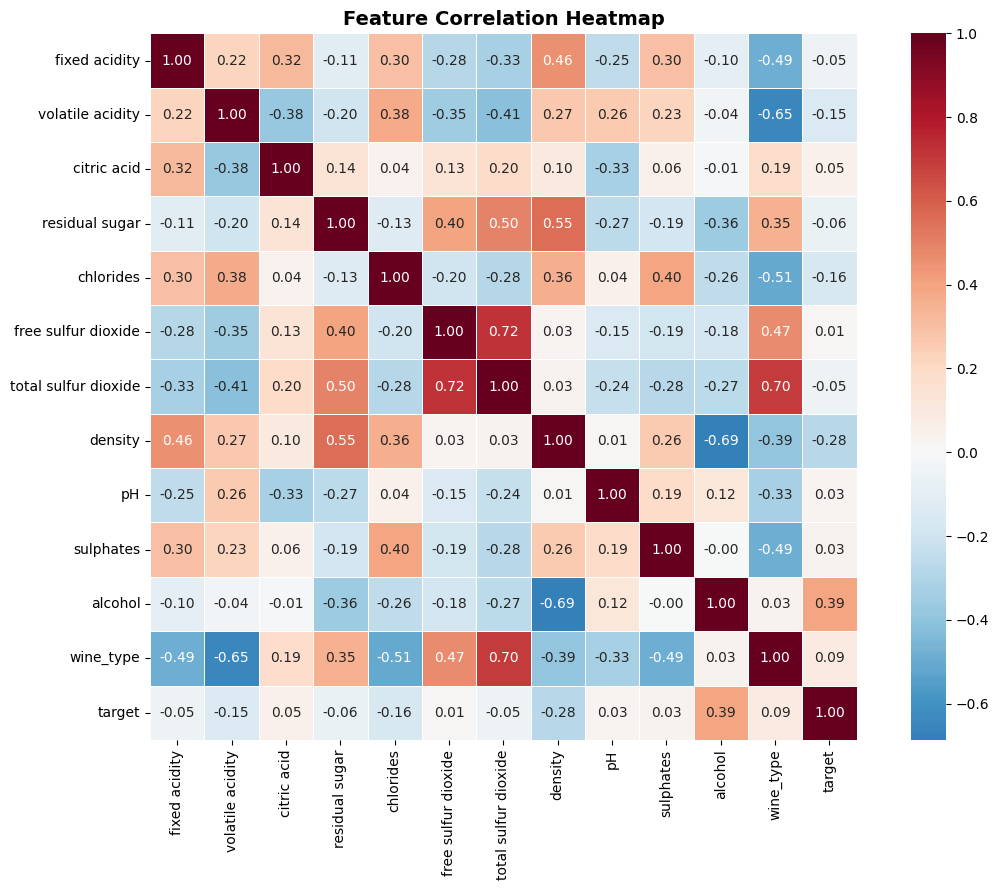

In [9]:
plt.figure(figsize=(12, 9))
corr = df.drop('quality', axis=1).corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            square=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

---
## Cell 10: Prepare Features and Target + Train-Test Split

In [10]:
# Define feature columns
feature_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                'pH', 'sulphates', 'alcohol', 'wine_type']

X = df[feature_cols]
y = df['target']

print(f'Feature matrix shape: {X.shape}')
print(f'Number of features:   {X.shape[1]}')
print(f'Features: {list(X.columns)}')

# Train-test split (80/20, stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f'\nTrain set: {X_train.shape[0]} samples')
print(f'Test set:  {X_test.shape[0]} samples')

Feature matrix shape: (6497, 12)
Number of features:   12
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'wine_type']

Train set: 5197 samples
Test set:  1300 samples


---
## Cell 11: Feature Scaling

In [11]:
# Scale features for models that need it (Logistic Regression, kNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Feature scaling done!')
print(f'Scaled train shape: {X_train_scaled.shape}')
print(f'Scaled test shape:  {X_test_scaled.shape}')

Feature scaling done!
Scaled train shape: (5197, 12)
Scaled test shape:  (1300, 12)


---
## Cell 12: Helper Function to Evaluate Models

In [12]:
def evaluate_model(model, model_name, X_tr, X_te, y_tr, y_te):
    """
    Train a model, make predictions, and calculate all evaluation metrics.
    Returns a dictionary of metrics.
    """
    # Train
    model.fit(X_tr, y_tr)

    # Predict
    y_pred = model.predict(X_te)
    y_prob = model.predict_proba(X_te)[:, 1]

    # Calculate metrics
    acc = accuracy_score(y_te, y_pred)
    auc = roc_auc_score(y_te, y_prob)
    prec = precision_score(y_te, y_pred, zero_division=0)
    rec = recall_score(y_te, y_pred, zero_division=0)
    f1 = f1_score(y_te, y_pred, zero_division=0)
    mcc = matthews_corrcoef(y_te, y_pred)

    # Print results
    print(f'\n{"=" * 60}')
    print(f'  MODEL: {model_name}')
    print(f'{"=" * 60}')
    print(f'  Accuracy:  {acc:.4f}')
    print(f'  AUC Score: {auc:.4f}')
    print(f'  Precision: {prec:.4f}')
    print(f'  Recall:    {rec:.4f}')
    print(f'  F1 Score:  {f1:.4f}')
    print(f'  MCC Score: {mcc:.4f}')
    print(f'\n  Classification Report:')
    print(classification_report(y_te, y_pred, target_names=['Bad Wine', 'Good Wine']))

    return {
        'Model': model_name,
        'Accuracy': round(acc, 4),
        'AUC': round(auc, 4),
        'Precision': round(prec, 4),
        'Recall': round(rec, 4),
        'F1': round(f1, 4),
        'MCC': round(mcc, 4),
        'y_pred': y_pred,
        'y_prob': y_prob
    }

print('Evaluation function defined!')

Evaluation function defined!


---
## Cell 13: Model 1 - Logistic Regression

In [13]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_results = evaluate_model(lr_model, 'Logistic Regression', X_train_scaled, X_test_scaled, y_train, y_test)


  MODEL: Logistic Regression
  Accuracy:  0.8223
  AUC Score: 0.8048
  Precision: 0.6147
  Recall:    0.2617
  F1 Score:  0.3671
  MCC Score: 0.3178

  Classification Report:
              precision    recall  f1-score   support

    Bad Wine       0.84      0.96      0.90      1044
   Good Wine       0.61      0.26      0.37       256

    accuracy                           0.82      1300
   macro avg       0.73      0.61      0.63      1300
weighted avg       0.80      0.82      0.79      1300



---
## Cell 14: Model 1 - Logistic Regression Confusion Matrix

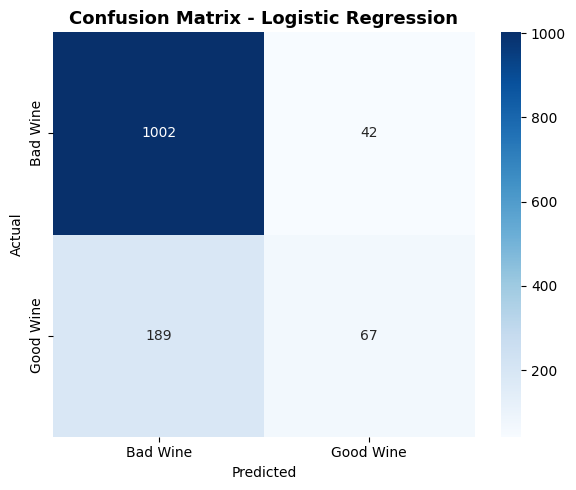

In [14]:
cm = confusion_matrix(y_test, lr_results['y_pred'])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bad Wine', 'Good Wine'],
            yticklabels=['Bad Wine', 'Good Wine'])
plt.title('Confusion Matrix - Logistic Regression', fontsize=13, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

---
## Cell 15: Model 2 - Decision Tree Classifier

In [15]:
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)
dt_results = evaluate_model(dt_model, 'Decision Tree', X_train, X_test, y_train, y_test)


  MODEL: Decision Tree
  Accuracy:  0.8508
  AUC Score: 0.8019
  Precision: 0.6220
  Recall:    0.6172
  F1 Score:  0.6196
  MCC Score: 0.5268

  Classification Report:
              precision    recall  f1-score   support

    Bad Wine       0.91      0.91      0.91      1044
   Good Wine       0.62      0.62      0.62       256

    accuracy                           0.85      1300
   macro avg       0.76      0.76      0.76      1300
weighted avg       0.85      0.85      0.85      1300



---
## Cell 16: Model 2 - Decision Tree Confusion Matrix

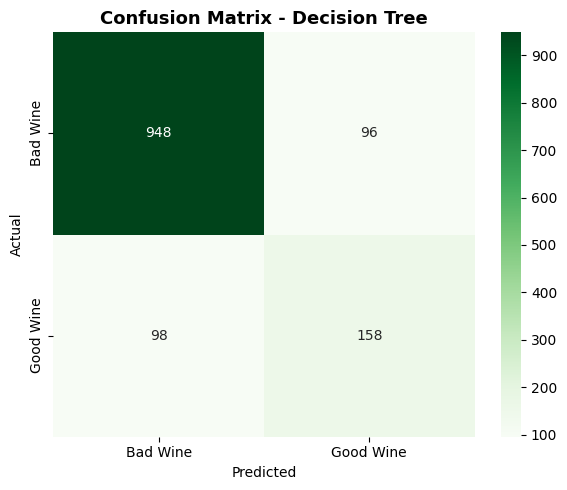

In [16]:
cm = confusion_matrix(y_test, dt_results['y_pred'])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Bad Wine', 'Good Wine'],
            yticklabels=['Bad Wine', 'Good Wine'])
plt.title('Confusion Matrix - Decision Tree', fontsize=13, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

---
## Cell 17: Model 3 - K-Nearest Neighbors (kNN)

In [17]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_results = evaluate_model(knn_model, 'kNN', X_train_scaled, X_test_scaled, y_train, y_test)


  MODEL: kNN
  Accuracy:  0.8362
  AUC Score: 0.8307
  Precision: 0.6039
  Recall:    0.4883
  F1 Score:  0.5400
  MCC Score: 0.4453

  Classification Report:
              precision    recall  f1-score   support

    Bad Wine       0.88      0.92      0.90      1044
   Good Wine       0.60      0.49      0.54       256

    accuracy                           0.84      1300
   macro avg       0.74      0.70      0.72      1300
weighted avg       0.83      0.84      0.83      1300



---
## Cell 18: Model 3 - kNN Confusion Matrix

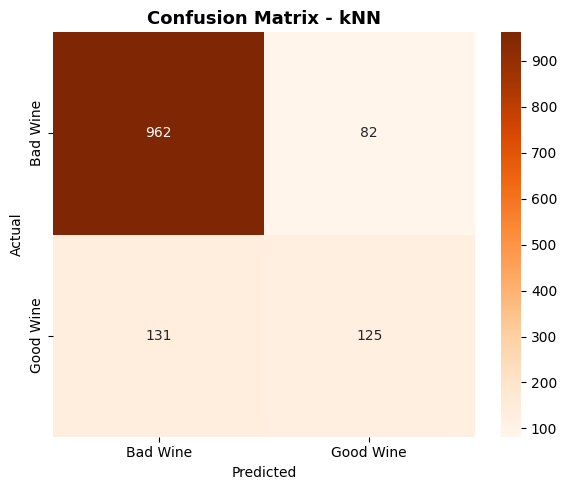

In [18]:
cm = confusion_matrix(y_test, knn_results['y_pred'])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Bad Wine', 'Good Wine'],
            yticklabels=['Bad Wine', 'Good Wine'])
plt.title('Confusion Matrix - kNN', fontsize=13, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

---
## Cell 19: Model 4 - Naive Bayes (Gaussian)

In [19]:
nb_model = GaussianNB()
nb_results = evaluate_model(nb_model, 'Naive Bayes', X_train, X_test, y_train, y_test)


  MODEL: Naive Bayes
  Accuracy:  0.7392
  AUC Score: 0.7494
  Precision: 0.3955
  Recall:    0.6133
  F1 Score:  0.4809
  MCC Score: 0.3310

  Classification Report:
              precision    recall  f1-score   support

    Bad Wine       0.89      0.77      0.83      1044
   Good Wine       0.40      0.61      0.48       256

    accuracy                           0.74      1300
   macro avg       0.64      0.69      0.65      1300
weighted avg       0.79      0.74      0.76      1300



---
## Cell 20: Model 4 - Naive Bayes Confusion Matrix

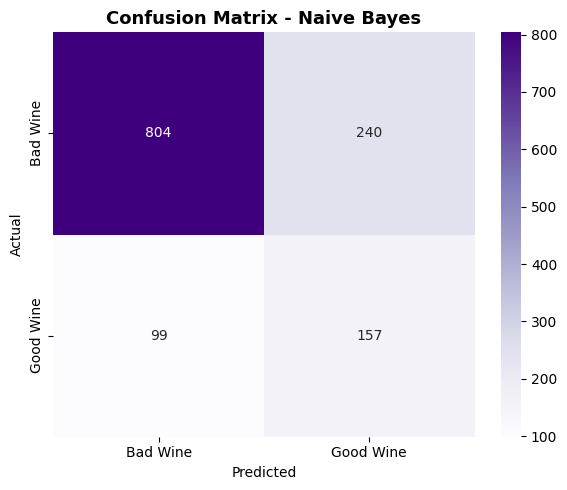

In [20]:
cm = confusion_matrix(y_test, nb_results['y_pred'])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Bad Wine', 'Good Wine'],
            yticklabels=['Bad Wine', 'Good Wine'])
plt.title('Confusion Matrix - Naive Bayes', fontsize=13, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

---
## Cell 21: Model 5 - Random Forest (Ensemble)

In [21]:
rf_model = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)
rf_results = evaluate_model(rf_model, 'Random Forest (Ensemble)', X_train, X_test, y_train, y_test)


  MODEL: Random Forest (Ensemble)
  Accuracy:  0.8869
  AUC Score: 0.9144
  Precision: 0.8011
  Recall:    0.5664
  F1 Score:  0.6636
  MCC Score: 0.6110

  Classification Report:
              precision    recall  f1-score   support

    Bad Wine       0.90      0.97      0.93      1044
   Good Wine       0.80      0.57      0.66       256

    accuracy                           0.89      1300
   macro avg       0.85      0.77      0.80      1300
weighted avg       0.88      0.89      0.88      1300



---
## Cell 22: Model 5 - Random Forest Confusion Matrix

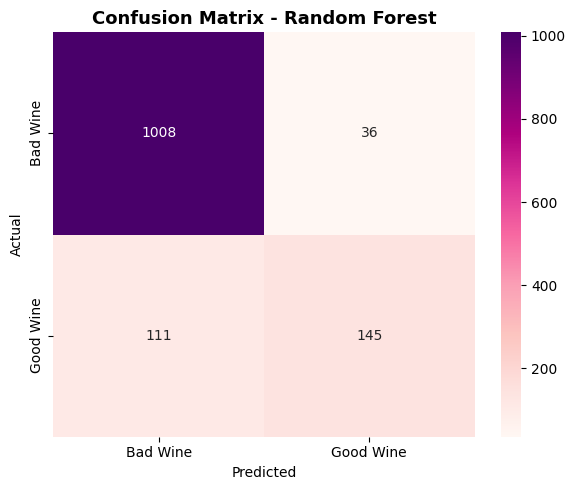

In [22]:
cm = confusion_matrix(y_test, rf_results['y_pred'])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu',
            xticklabels=['Bad Wine', 'Good Wine'],
            yticklabels=['Bad Wine', 'Good Wine'])
plt.title('Confusion Matrix - Random Forest', fontsize=13, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

---
## Cell 23: Model 6 - XGBoost (Ensemble)

In [23]:
xgb_model = XGBClassifier(
    n_estimators=200, max_depth=6, learning_rate=0.1,
    random_state=42, eval_metric='logloss', use_label_encoder=False
)
xgb_results = evaluate_model(xgb_model, 'XGBoost (Ensemble)', X_train, X_test, y_train, y_test)


  MODEL: XGBoost (Ensemble)
  Accuracy:  0.8785
  AUC Score: 0.9004
  Precision: 0.7450
  Recall:    0.5820
  F1 Score:  0.6535
  MCC Score: 0.5877

  Classification Report:
              precision    recall  f1-score   support

    Bad Wine       0.90      0.95      0.93      1044
   Good Wine       0.74      0.58      0.65       256

    accuracy                           0.88      1300
   macro avg       0.82      0.77      0.79      1300
weighted avg       0.87      0.88      0.87      1300



---
## Cell 24: Model 6 - XGBoost Confusion Matrix

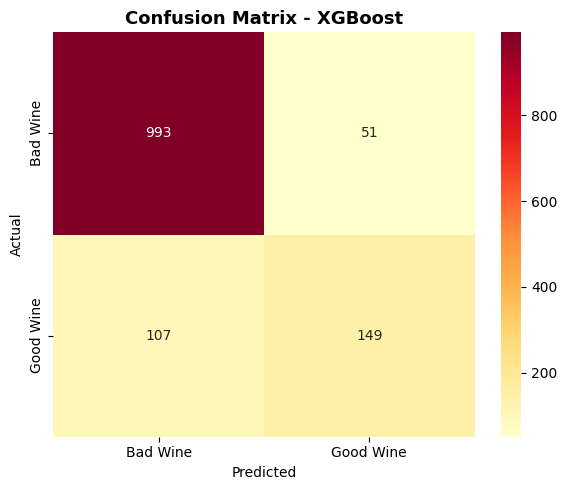

In [24]:
cm = confusion_matrix(y_test, xgb_results['y_pred'])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd',
            xticklabels=['Bad Wine', 'Good Wine'],
            yticklabels=['Bad Wine', 'Good Wine'])
plt.title('Confusion Matrix - XGBoost', fontsize=13, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

---
## Cell 25: 📊 Comparison Table - All 6 Models

In [25]:
# Collect all results into comparison table
all_results = [lr_results, dt_results, knn_results, nb_results, rf_results, xgb_results]

comparison_df = pd.DataFrame([{
    'ML Model Name': r['Model'],
    'Accuracy': r['Accuracy'],
    'AUC': r['AUC'],
    'Precision': r['Precision'],
    'Recall': r['Recall'],
    'F1': r['F1'],
    'MCC': r['MCC']
} for r in all_results])

print('=' * 80)
print('         COMPARISON TABLE - ALL 6 MODELS')
print('=' * 80)
print(comparison_df.to_string(index=False))
print('\n')

# Also display as a nice DataFrame
comparison_df

         COMPARISON TABLE - ALL 6 MODELS
           ML Model Name  Accuracy    AUC  Precision  Recall     F1    MCC
     Logistic Regression    0.8223 0.8048     0.6147  0.2617 0.3671 0.3178
           Decision Tree    0.8508 0.8019     0.6220  0.6172 0.6196 0.5268
                     kNN    0.8362 0.8307     0.6039  0.4883 0.5400 0.4453
             Naive Bayes    0.7392 0.7494     0.3955  0.6133 0.4809 0.3310
Random Forest (Ensemble)    0.8869 0.9144     0.8011  0.5664 0.6636 0.6110
      XGBoost (Ensemble)    0.8785 0.9004     0.7450  0.5820 0.6535 0.5877




,ML Model Name,Accuracy,AUC,Precision,Recall,F1,MCC
0,Logistic Regression,0.8223,0.8048,0.6147,0.2617,0.3671,0.3178
1,Decision Tree,0.8508,0.8019,0.6220,0.6172,0.6196,0.5268
2,kNN,0.8362,0.8307,0.6039,0.4883,0.5400,0.4453
3,Naive Bayes,0.7392,0.7494,0.3955,0.6133,0.4809,0.3310
4,Random Forest (Ensemble),0.8869,0.9144,0.8011,0.5664,0.6636,0.6110
5,XGBoost (Ensemble),0.8785,0.9004,0.7450,0.5820,0.6535,0.5877


---
## Cell 26: Best Model by Each Metric

In [26]:
print(' Best Model by Each Metric:')
print('=' * 50)
for metric in ['Accuracy', 'AUC', 'Precision', 'Recall', 'F1', 'MCC']:
    best_idx = comparison_df[metric].idxmax()
    best_model = comparison_df.loc[best_idx, 'ML Model Name']
    best_val = comparison_df.loc[best_idx, metric]
    print(f'  {metric:12s} --> {best_model} ({best_val:.4f})')

 Best Model by Each Metric:
  Accuracy     --> Random Forest (Ensemble) (0.8869)
  AUC          --> Random Forest (Ensemble) (0.9144)
  Precision    --> Random Forest (Ensemble) (0.8011)
  Recall       --> Decision Tree (0.6172)
  F1           --> Random Forest (Ensemble) (0.6636)
  MCC          --> Random Forest (Ensemble) (0.6110)


---
## Cell 27: 📈 ROC Curves - All Models

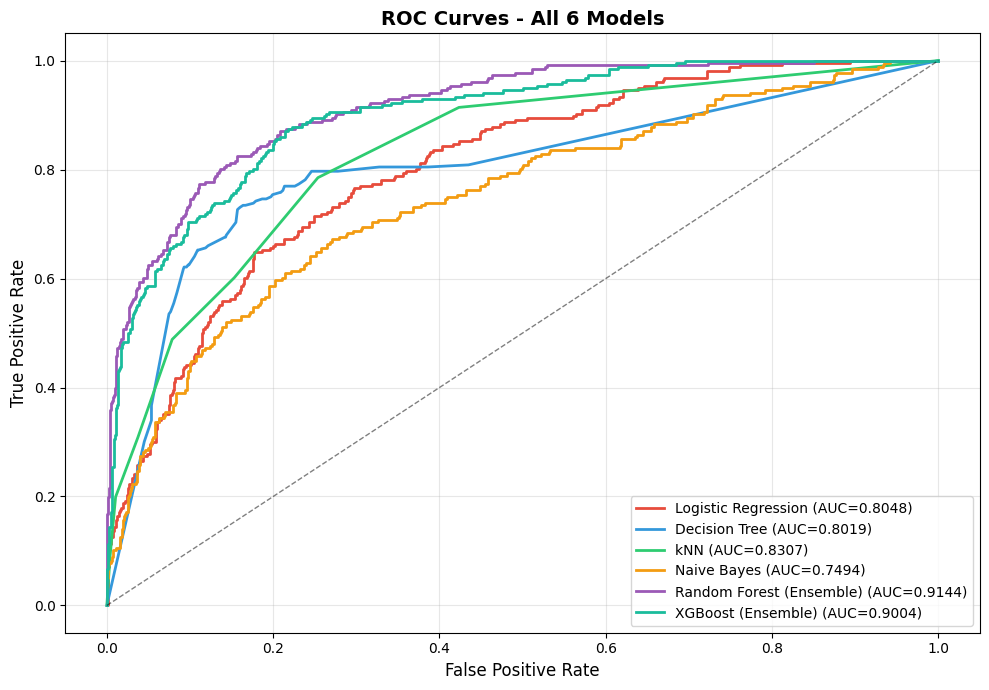

In [27]:
plt.figure(figsize=(10, 7))
colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c']

for res, color in zip(all_results, colors):
    fpr, tpr, _ = roc_curve(y_test, res['y_prob'])
    plt.plot(fpr, tpr, label=f"{res['Model']} (AUC={res['AUC']:.4f})", color=color, linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, linewidth=1)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - All 6 Models', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

---
## Cell 28: 📊 Metrics Comparison Bar Charts

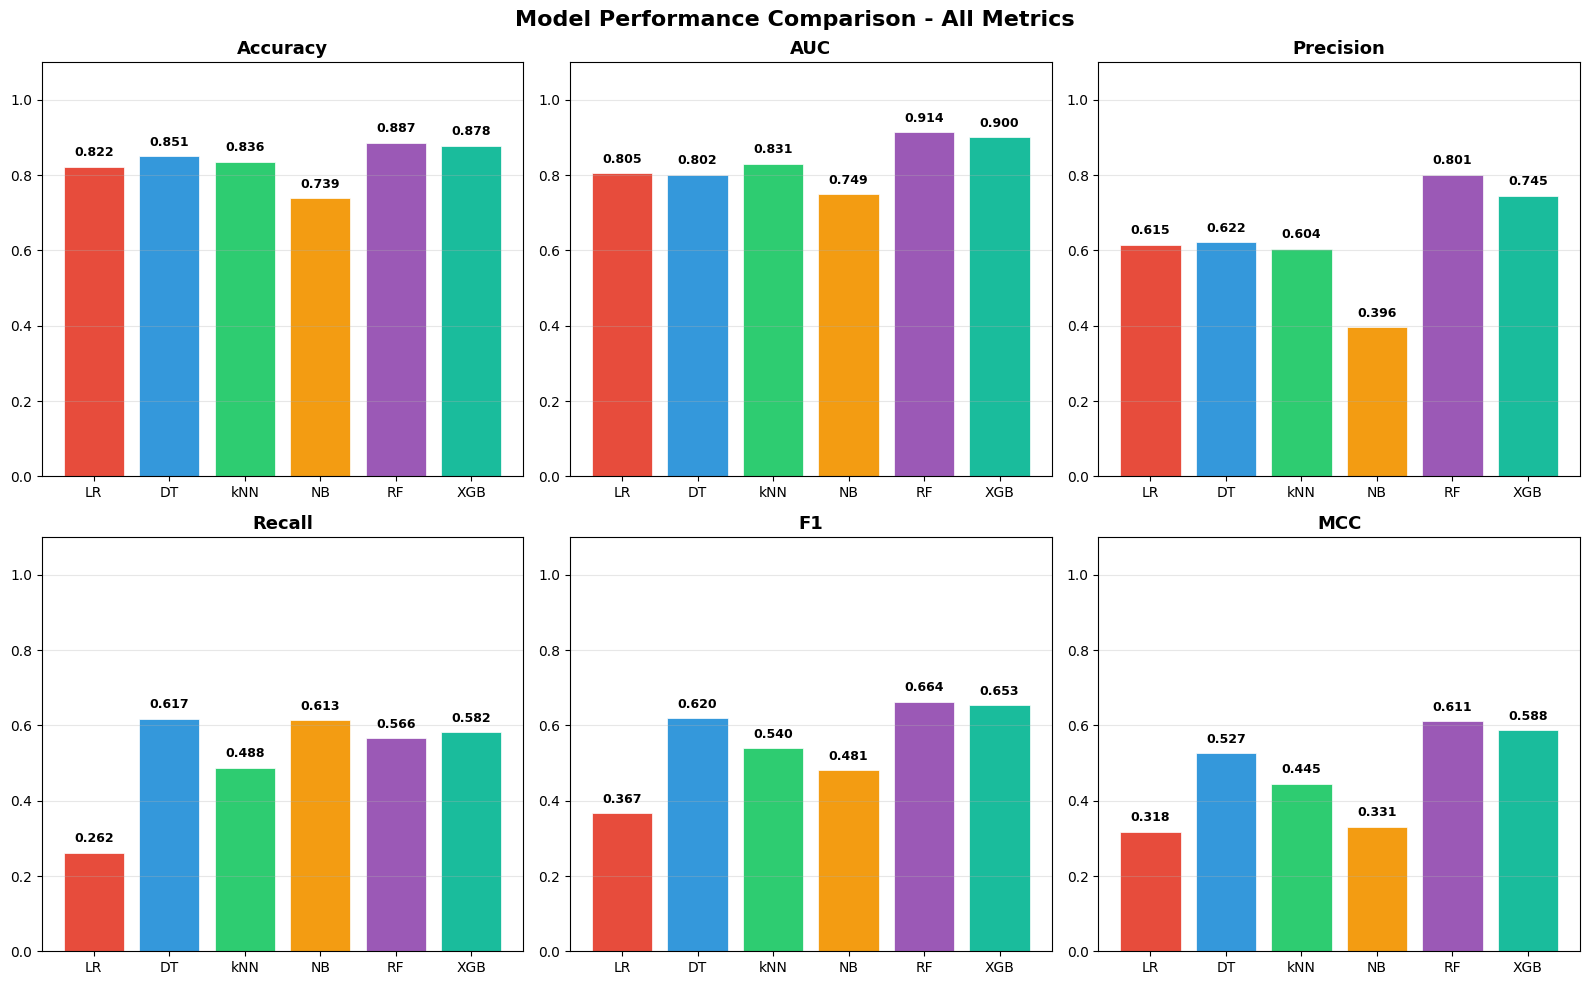

In [28]:
metrics = ['Accuracy', 'AUC', 'Precision', 'Recall', 'F1', 'MCC']
short_names = ['LR', 'DT', 'kNN', 'NB', 'RF', 'XGB']
colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

for idx, metric in enumerate(metrics):
    ax = axes[idx // 3][idx % 3]
    values = comparison_df[metric].values
    bars = ax.bar(short_names, values, color=colors, edgecolor='white', linewidth=0.5)
    ax.set_title(metric, fontsize=13, fontweight='bold')
    ax.set_ylim(0, 1.1)
    ax.grid(axis='y', alpha=0.3)

    for bar, val in zip(bars, values):
        ax.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.02,
                f'{val:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.suptitle('Model Performance Comparison - All Metrics', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

---
## Cell 29: Feature Importance (Random Forest)

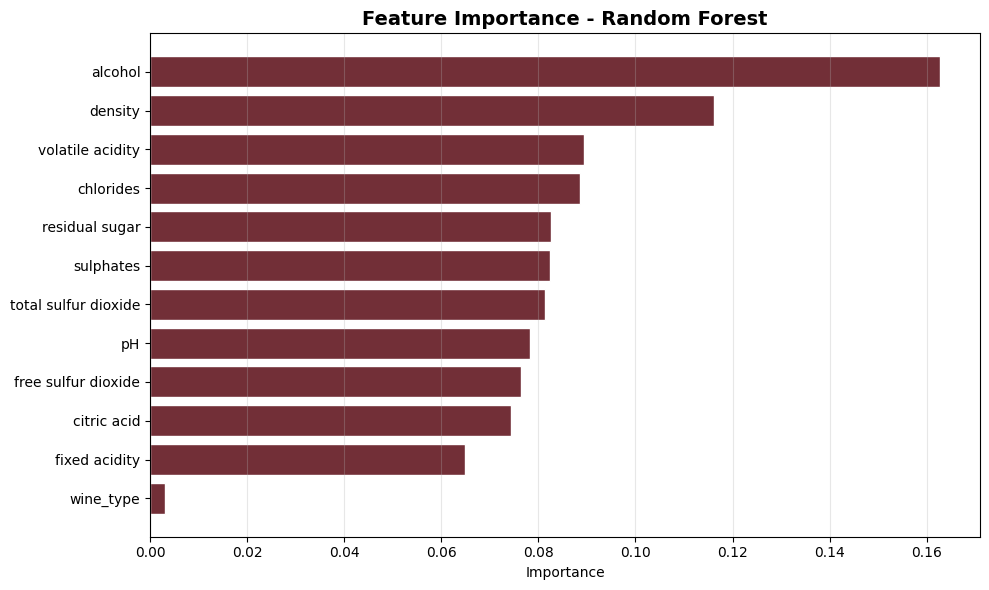


Feature Importance Rankings:
             Feature  Importance
             alcohol    0.162852
             density    0.116127
    volatile acidity    0.089398
           chlorides    0.088488
      residual sugar    0.082615
           sulphates    0.082356
total sulfur dioxide    0.081400
                  pH    0.078180
 free sulfur dioxide    0.076433
         citric acid    0.074327
       fixed acidity    0.064791
           wine_type    0.003033


In [29]:
# Feature importance from Random Forest
importances = rf_model.feature_importances_
feat_imp_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': importances
}).sort_values('Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'], color='#722F37', edgecolor='white')
plt.title('Feature Importance - Random Forest', fontsize=14, fontweight='bold')
plt.xlabel('Importance')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print('\nFeature Importance Rankings:')
print(feat_imp_df.sort_values('Importance', ascending=False).to_string(index=False))

---
## Cell 30: 📝 Model Performance Observations

In [30]:
observations = {
    'Logistic Regression': 'Solid baseline with good accuracy. Being linear, it provides well-calibrated probabilities (strong AUC) but struggles to capture non-linear feature interactions. Moderate recall for minority class due to class imbalance.',
    'Decision Tree': 'Captures non-linear patterns naturally. With max_depth=10, it balances complexity with generalization. Balanced precision-recall trade-off but lower AUC indicates less reliable probability estimates.',
    'kNN': 'With k=7 and StandardScaler, achieves reasonable performance. Sensitive to feature scaling and choice of k. Balanced precision and recall suggest consistent but not exceptional results.',
    'Naive Bayes': 'Fastest model with lowest accuracy but notably the highest recall among non-ensemble models. Feature independence assumption does not fully hold for correlated physicochemical properties, reducing precision.',
    'Random Forest (Ensemble)': 'Best overall performer with highest accuracy, AUC, precision, F1, and MCC. Aggregating 200 trees reduces overfitting while capturing complex interactions. Alcohol and volatile acidity are top features.',
    'XGBoost (Ensemble)': 'Near-best performance across all metrics, closely competing with Random Forest. Gradient boosting approach corrects errors sequentially. Built-in regularization prevents overfitting effectively.'
}

print('📝 MODEL PERFORMANCE OBSERVATIONS')
print('=' * 70)
for model_name, obs in observations.items():
    print(f'\n🔹 {model_name}:')
    print(f'   {obs}')

📝 MODEL PERFORMANCE OBSERVATIONS

🔹 Logistic Regression:
   Solid baseline with good accuracy. Being linear, it provides well-calibrated probabilities (strong AUC) but struggles to capture non-linear feature interactions. Moderate recall for minority class due to class imbalance.

🔹 Decision Tree:
   Captures non-linear patterns naturally. With max_depth=10, it balances complexity with generalization. Balanced precision-recall trade-off but lower AUC indicates less reliable probability estimates.

🔹 kNN:
   With k=7 and StandardScaler, achieves reasonable performance. Sensitive to feature scaling and choice of k. Balanced precision and recall suggest consistent but not exceptional results.

🔹 Naive Bayes:
   Fastest model with lowest accuracy but notably the highest recall among non-ensemble models. Feature independence assumption does not fully hold for correlated physicochemical properties, reducing precision.

🔹 Random Forest (Ensemble):
   Best overall performer with highest accura

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

---
## Cell 31: Save Test Data CSV (for Streamlit App Upload)

In [31]:
# Save test data as CSV so it can be uploaded to the Streamlit app
test_data = X_test.copy()
test_data['quality'] = df.loc[X_test.index, 'quality'].values
test_data['target'] = y_test.values
test_data.to_csv('test_data.csv', index=False)

print('Test data saved as test_data.csv')
print(f'Shape: {test_data.shape}')
print(f'\nFirst 5 rows:')
test_data.head()

Test data saved as test_data.csv
Shape: (1300, 14)

First 5 rows:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type,quality,target
2156,6.1,0.41,0.24,1.6,0.049,16.0,137.0,0.9930,3.32,0.50,10.4,1,6,0
3479,7.7,0.30,0.42,14.3,0.045,45.0,213.0,0.9991,3.18,0.63,9.2,1,5,0
3136,8.1,0.28,0.49,1.0,0.040,32.0,148.0,0.9936,3.13,0.41,10.0,1,6,0
3726,9.1,0.33,0.38,1.7,0.062,50.5,344.0,0.9958,3.10,0.70,9.5,1,5,0
1615,6.3,0.48,0.04,1.1,0.046,30.0,99.0,0.9928,3.24,0.36,9.6,1,6,0


---
## Cell 32: Final Summary

In [32]:
print('=' * 70)
print('   ALL 6 MODELS TRAINED AND EVALUATED SUCCESSFULLY!')
print('=' * 70)
print(f'\n Dataset: Wine Quality (UCI) - {len(df)} instances, {len(feature_cols)} features')
print(f' Task: Binary Classification (Good Wine vs Bad Wine)')
print(f' Train/Test Split: 80/20 (stratified)')
print(f'\n FINAL COMPARISON TABLE:')
print(comparison_df.to_string(index=False))
print(f'\n Next steps:')
print(f'   1. Push app.py, requirements.txt, README.md, and this notebook to GitHub')
print(f'   2. Deploy the Streamlit app on Streamlit Community Cloud')
print(f'   3. Take a screenshot of this notebook running on BITS Virtual Lab')
print(f'   4. Prepare the submission PDF')

   ALL 6 MODELS TRAINED AND EVALUATED SUCCESSFULLY!

 Dataset: Wine Quality (UCI) - 6497 instances, 12 features
 Task: Binary Classification (Good Wine vs Bad Wine)
 Train/Test Split: 80/20 (stratified)

 FINAL COMPARISON TABLE:
           ML Model Name  Accuracy    AUC  Precision  Recall     F1    MCC
     Logistic Regression    0.8223 0.8048     0.6147  0.2617 0.3671 0.3178
           Decision Tree    0.8508 0.8019     0.6220  0.6172 0.6196 0.5268
                     kNN    0.8362 0.8307     0.6039  0.4883 0.5400 0.4453
             Naive Bayes    0.7392 0.7494     0.3955  0.6133 0.4809 0.3310
Random Forest (Ensemble)    0.8869 0.9144     0.8011  0.5664 0.6636 0.6110
      XGBoost (Ensemble)    0.8785 0.9004     0.7450  0.5820 0.6535 0.5877

 Next steps:
   1. Push app.py, requirements.txt, README.md, and this notebook to GitHub
   2. Deploy the Streamlit app on Streamlit Community Cloud
   3. Take a screenshot of this notebook running on BITS Virtual Lab
   4. Prepare the submissio